# 4.4 应用：计算技术指标

<div class="alert alert-block alert-success">
本应用将利用Yahoo Finance获取股票数据，计算股票价格的日收益率，计算技术指标（MA、布林带、MACD），以帮助识别市场趋势和反转点。通过本应用，将熟悉单个股票日度和月度收益率的计算、技术指标计算和分析的整个过程。
</div>


## 1. 从Yahoo Finance获取股票数据

yfinance是一个Python库，它提供了一个简单的方式来获取和处理Yahoo Finance上的金融数据。通过yfinance，你可以轻松地获取股票、ETF、指数等金融工具的历史价格数据、股息数据、公司基本信息等。这个库可以让用户在他们的Python应用程序中方便地访问Yahoo Finance的数据，以便进行分析、可视化或其他操作。

In [1]:
import pandas as pd
import yfinance as yf

stock_data = yf.download('AAPL', start='2015-01-01', end='2022-01-01')

print(stock_data.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.065674   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.038712   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.127594   
2021-12-30  179.470001  180.570007  178.089996  178.199997  175.962402   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.340317   

              Volume  
Date                  
2021-12-27  74919600  
2021-12-28  79144300  
2021-12-29  62348900  
2021-12-30  59773000  
2021-12-31  64062300  


可以观察到，我们获取的数据是`pandas.DataFrame数据框`格式的数据，里面包含了开、高、低、收、调整后的收盘价、成交量。

> 在金融数据中，通常会同时提供原始收盘价（Close）和调整后的收盘价（Adj Close），投资者和分析师在进行回报率计算和其他分析时更倾向于使用调整后的收盘价。"Adj Close"指的是调整后的收盘价，它是指股票或其他金融资产的收盘价经过了调整后的值。这种调整通常包括了分红、拆股、合并等因素的影响，目的是为了更准确地反映资产的实际价值。



### 1.1 保存数据到CSV文件

要将DataFrame保存到CSV文件中，你可以使用to_csv()方法。这个方法允许你将DataFrame的内容写入到一个CSV文件中。

In [2]:
stock_data.to_csv('datasets/AAPL.csv')

### 1.2 获取基本信息

`pd.DataFrame.info()`方法用于显示DataFrame的基本信息摘要，包括列的数据类型、非空值数量以及占用内存的信息等。调用`info()`方法将会输出以下内容：

1. DataFrame的行数和列数。
2. 每列的名称。
3. 每列中非空值的数量。
4. 每列的数据类型。
5. 内存占用情况。

这个方法对于快速查看DataFrame的结构和总体信息非常有用，特别是在处理大型数据集时，可以帮助你了解数据的规模、缺失值情况和数据类型，以便进行进一步的数据清洗和分析。

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2015-01-02 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1763 non-null   float64
 1   High       1763 non-null   float64
 2   Low        1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Adj Close  1763 non-null   float64
 5   Volume     1763 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


### 1.3 获取日期序列

在Pandas中，`DataFrame.index`属性可以用来获取DataFrame的索引，它返回一个表示DataFrame索引的对象。这个对象通常是一个`Index`或`DatetimeIndex`。

In [4]:
stock_data.index  

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1763, freq=None)

如果使用`stock_data.index.values`将获取np.ndarray数据类型的数据。

### 1.4 获取数据框的列名

`pandas.DataFrame.columns`属性用于获取DataFrame的列标签，返回一个表示DataFrame列标签的对象，通常是一个`Index`对象或类似的数据结构。这个属性可以让你轻松地访问DataFrame的列名，进行列的筛选、重命名、迭代等操作，以及在数据分析和处理过程中进行列相关的操作。

In [5]:
stock_data.columns  

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

如果使用`stock_data.columns.values`将获取np.ndarray数据类型的数据。

## 2. 计算每日收益率

使用`pd.DataFrame.pct_change()`方法可以计算DataFrame中每个元素与其前一个元素之间的变化百分比，即计算每个元素的变化率。对于股票收益率的计算，通常将每个交易日的股票收盘价作为DataFrame的一列，然后使用`pct_change()`方法计算每日收益率。

具体来说，`pct_change()`方法将每个元素与其前一个元素进行比较，并计算出相对变化的百分比。例如，如果一个DataFrame包含每日的股票收盘价，调用`pct_change()`将返回一个新的DataFrame，其中包含每日收益率，即每日收盘价相对于前一日收盘价的变化百分比。

In [6]:
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

In [7]:
stock_data['Daily_Return']

Date
2015-01-02         NaN
2015-01-05   -0.028171
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2021-12-27    0.022975
2021-12-28   -0.005767
2021-12-29    0.000502
2021-12-30   -0.006578
2021-12-31   -0.003535
Name: Daily_Return, Length: 1763, dtype: float64

## 3. 将日收益率转换成月度收益率

In [8]:
resample_close = stock_data['Adj Close'].reindex(pd.date_range(start=stock_data.index.min(),
                                         end=stock_data.index.max(),
                                         freq='D'))

In [9]:
diff = resample_close.resample('M').last() - resample_close.resample('M').first()
diff/resample_close.resample('M').first()

2015-01-31    0.071618
2015-02-28    0.087136
2015-03-31   -0.036099
2015-04-30    0.007243
2015-05-31    0.014534
                ...   
2021-08-31    0.044925
2021-09-30   -0.072192
2021-10-31    0.050123
2021-11-30    0.111313
2021-12-31    0.077684
Freq: M, Name: Adj Close, Length: 84, dtype: float64

Pandas的DataFrame对象具有许多聚合函数，用于在数据上执行汇总操作。这些聚合函数允许你在DataFrame的行或列上执行各种统计计算。以下是一些常用的DataFrame聚合函数：
1. `mean()`: 计算均值。
2. `sum()`: 计算总和。
3. `median()`: 计算中位数。
4. `min()`: 计算最小值。
5. `max()`: 计算最大值。
6. `std()`: 计算标准差。
7. `var()`: 计算方差。
8. `count()`: 计算非缺失值的数量。
9. `quantile()`: 计算分位数。
10. `describe()`: 生成描述性统计摘要。
11. `first()`: 返回第一个非空值。
12. `last()`: 返回最后一个非空值。
13. `idxmin()`: 返回最小值的索引。
14. `idxmax()`: 返回最大值的索引。

除了上述常见的聚合函数之外，你还可以自定义函数并使用`agg()`或`apply()`方法应用它们。这样你可以执行各种自定义的聚合操作。

## 4. 技术指标的计算

技术指标是根据股票价格和成交量等市场数据计算得出的量化指标，用于分析股票价格走势和预测市场趋势的工具。它们可以提供有关股票价格走势、市场情绪和交易活动的重要信息。以下是一些常见的技术指标以及它们的帮助：

### 4.1 移动平均线

`pd.DataFrame.rolling(window=20)`方法是用于执行滚动窗口操作的功能。具体来说，它会在DataFrame的数据上创建一个滚动窗口对象，该窗口将应用于指定的窗口大小（这里是20）以执行各种操作，如计算移动平均值、移动总和等。

当你调用`pd.DataFrame.rolling(window=20)`时，它会返回一个Rolling对象，该对象可以用于执行基于窗口的函数操作，例如计算滚动窗口内的平均值、方差等。这个滚动窗口对象可以进一步与其他函数配合使用，比如`.mean()`、`.sum()`等，以计算在每个窗口内的特定操作结果。

In [10]:
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

In [11]:
stock_data['MA_20']

Date
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
                 ...    
2021-12-27    169.309992
2021-12-28    170.250532
2021-12-29    170.945692
2021-12-30    171.608761
2021-12-31    172.290591
Name: MA_20, Length: 1763, dtype: float64

### 4.2 布林带

布林带（Bollinger Bands）是由约翰·布林格（John Bollinger）开发的一种技术指标，用于分析股票价格的波动性和可能的价格走势。它是一种基于移动平均线的波动性指标，由三条线组成：上轨、中轨和下轨。以下是布林带的计算公式：

**中轨（中心线）** 的计算： $ 中轨 = n日移动平均线 $  
**上轨（上限线）** 的计算：  $上轨 = 中轨 + k * n日标准差$  
**下轨（下限线）** 的计算：  $下轨 = 中轨 - k * n日标准差$  

其中，n表示计算移动平均线的窗口大小，k表示标准差的系数。

In [12]:
# 计算标准差
stock_data['STD_20'] = stock_data['Adj Close'].rolling(window=20).std()

# 计算布林带上轨和下轨
stock_data['Upper'] = stock_data['MA_20'] + 2 * stock_data['STD_20']
stock_data['Lower'] = stock_data['MA_20'] - 2 * stock_data['STD_20']

下面，我们来使用pandas绘制布林带。
1. 选择需要绘制的列名
2. 选择时间区间，例如'2020-01-02'至'2021-01-01'
3. 应用数据框对象的`plot`方法

In [13]:
plot_df = stock_data[['Adj Close', 'MA_20', 'Upper','Lower']]  

In [14]:
plot_df = plot_df.loc['2020-01-02':'2021-01-01']

<Axes: title={'center': 'Bollinger Bands'}, xlabel='Date'>

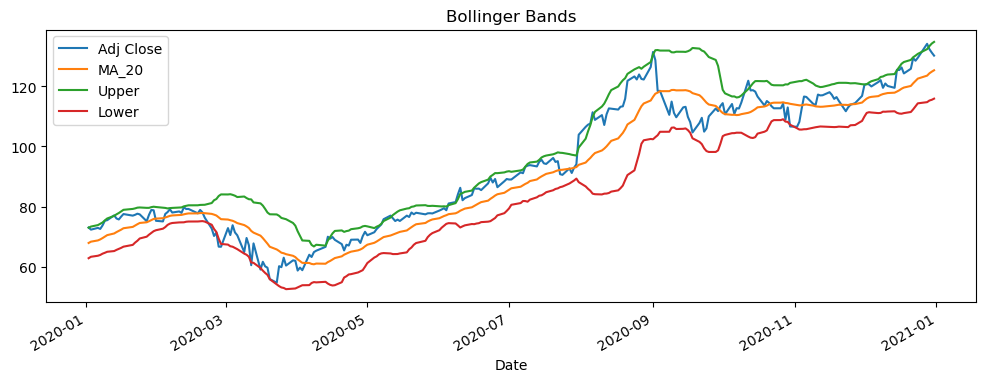

In [15]:
plot_df.plot(figsize=(12,4), title='Bollinger Bands')

### 4.3 MACD指标

要在Pandas中实现MACD指标，可以按照以下步骤：

1. 计算快速移动平均线（EMA12）。
1. 计算慢速移动平均线（EMA26）。
1. 计算MACD线，即快速移动平均线与慢速移动平均线的差值。
1. 计算信号线，通常是MACD线的9日指数移动平均值。


In [16]:
# 计算快速移动平均线（EMA12）
stock_data['EMA12'] = stock_data['Adj Close'].ewm(span=12, min_periods=0).mean()

# 计算慢速移动平均线（EMA26）
stock_data['EMA26'] = stock_data['Adj Close'].ewm(span=26, min_periods=0).mean()

# 计算MACD线
stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']


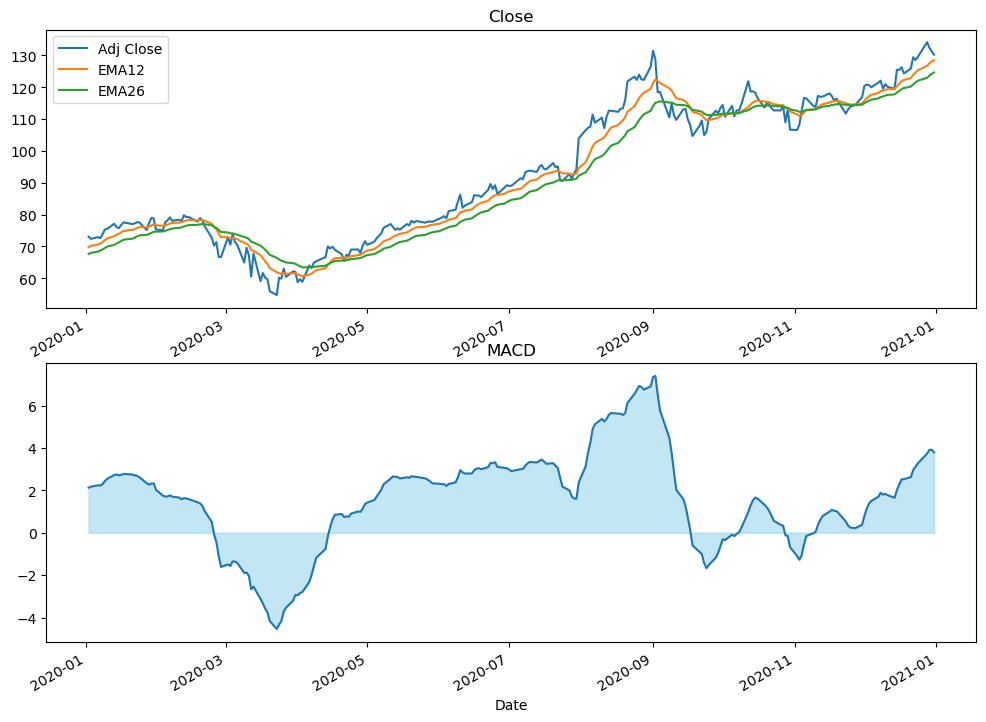

In [17]:
import matplotlib.pyplot as plt

# 创建图表
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,9))

# 绘制Adj Close折线图
close_df = stock_data[['Adj Close', 'EMA12', 'EMA26']]
close_df = close_df.loc['2020-01-02':'2021-01-01']
close_df.plot(ax=ax1, label='Adj Close', title='Close')

# 绘制MACD折线图
macd_df = stock_data['MACD']
macd_df = macd_df.loc['2020-01-02':'2021-01-01']
macd_df.plot(ax=ax2, label='MACD plot', title='MACD')

# 填充MACD折线图和0轴之间的空隙
ax2.fill_between(macd_df.index, macd_df.values.flatten(), 0,  color='skyblue', alpha=0.5)
